In [13]:
#Загрузка используемых в работе модулей
import math
from math import sqrt
import numpy as np
from scipy import linalg
import scipy.optimize as opt
import scipy.stats as sts
import matplotlib.pyplot as plt
import random

## Выбранное распределение - Экспоненциальное (См. подробности по ссылкам ниже)
[Статья Википедии](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

[Статья на scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon)

### Используемые функции в процессе работы
$$Mean = \frac{1}{\lambda} , Variance = \frac{1}{\lambda^{2}}, Exponential PDF = {\lambda}{e^{-\lambda{x}}}, Normal PDF = \frac{1}{\sigma\sqrt{2\pi}}{e^{-\frac{1}{2}( \,\frac{\mu - x}{\sigma}) \,^{2}}}$$

In [2]:
#Математическое ожидание экспоненциального распределения
def mat_ojidan(par_lambda):
    return 1 / par_lambda
#Дисперсия теоретического экспоненциального распределения
def variance(par_lambda):
    return 1 / par_lambda**2
#Аналог numpy.mean функции для расчета матем.ожидания
def func_mean(x):
    return sum(x) / len(x)
#Дисперсия экспоненциального распределения для выборок
def func_std(x):
    result = np.array([abs(i - func_mean(x)) for i in x])**2
    return sqrt(func_mean(result))
#Функция теоретической плотности вероятности, где x - определенное значение x среди всех возможных значений x на отрезке 
def expon_pdf(par_lambda, x):
    return (par_lambda * math.exp(-par_lambda * x))
#Функция генерации выборки с использованием дополнительного модуля random; при указании n > 1 выборка будет генерироваться на основе выборочных средних из n-объема
def sample_expon(size, par_lambda, n):
    new_array = []
    mu = mat_ojidan(par_lambda)
    for i in range(size):
        summa = 0
        for j in range(n):
            summa += mu**2 * random.expovariate(mu)
        new_array.append(summa / n)
    return new_array
#Функция нормальной плотности вероятности, использующейся для сравнения с выборкой
def normal_pdf(x, matem_ojidan, sigma):
    a = math.exp(-(x - matem_ojidan)**2 / 2 / sigma**2)
    b = sqrt(2 * math.pi) * sigma
    return a / b

### Генерация первой выборки, построение графика теоретической плотности вероятности распределения и сопоставление с выборкой

In [3]:
#Указание параметра - лямбы, создание экспоненциального распределения и выборки для теории
par_lambda = 1.5
ray_rv = sts.expon(scale=1 / par_lambda)
first_sample = sample_expon(1000, par_lambda, 1)

Theoretical mean - 0.67
Theoretical variance - 0.44


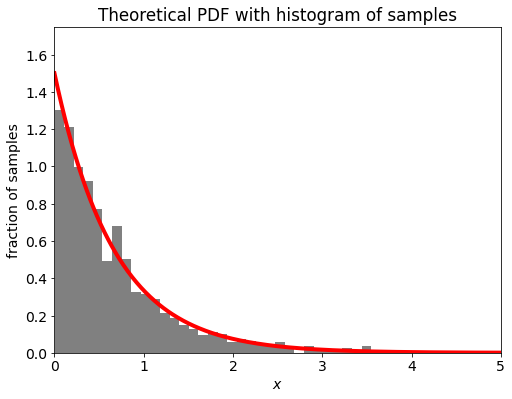

In [4]:
#Указание области определения, области значения PDF 
list_x = np.linspace(0, 10, 1000)
pdf = [expon_pdf(par_lambda, x = i) for i in list_x]
#Настройки графика
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 14
plt.title('Theoretical PDF with histogram of samples')
plt.xlim(0, 5)
plt.ylim(0, 1.75)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
#Построение графиков PDF и выборки
plt.hist(first_sample, density=True, color='grey', bins=40)
plt.plot(list_x, pdf, color='red', lw=4.0)
#Теоретические мат.ожидание и дисперсия
print('Theoretical mean -', round(mat_ojidan(par_lambda), 2))
print('Theoretical variance -', round(variance(par_lambda), 2))

### Создание выборок при разных объемах n (n = 10, 40, 100, 300, 500)

In [5]:
#Генерация выборок
list_x1 = sample_expon(1000, par_lambda, 10)
list_x2 = sample_expon(1000, par_lambda, 40)
list_x3 = sample_expon(1000, par_lambda, 100)
list_x4 = sample_expon(1000, par_lambda, 300)
list_x5 = sample_expon(1000, par_lambda, 500)

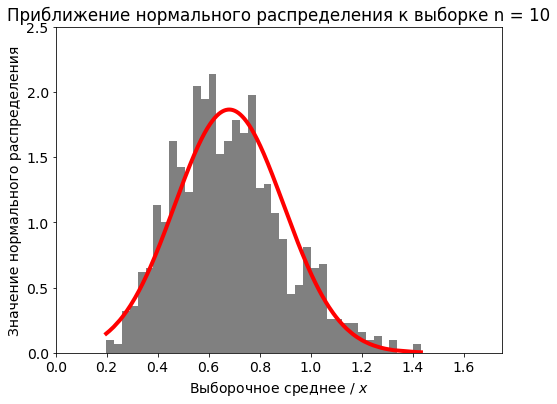

In [6]:
#Построение графика нормального распределения и гистограммы выборки 
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 14
plt.title('Приближение нормального распределения к выборке n = 10')
plt.xlim(0, 1.75)
plt.ylim(0, 2.5)
plt.ylabel('Значение нормального распределения')
plt.xlabel('Выборочное среднее / $x$')
plt.hist(list_x1, density=True, bins=40, color='grey')
plt.plot(sorted(list_x1), [normal_pdf(x, func_mean(list_x1), func_std(list_x1)) for x in sorted(list_x1)], color='red', lw=4.0)
plt.show()

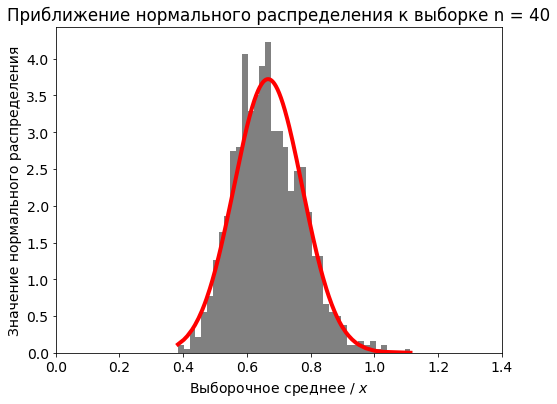

In [7]:
#Построение графика нормального распределения и гистограммы выборки 
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 14
plt.title('Приближение нормального распределения к выборке n = 40')
plt.xlim(0, 1.4)
plt.ylabel('Значение нормального распределения')
plt.xlabel('Выборочное среднее / $x$')
plt.hist(list_x2, density=True, bins=40, color='grey')
plt.plot(sorted(list_x2), [normal_pdf(x, func_mean(list_x2), func_std(list_x2)) for x in sorted(list_x2)], color='red', lw=4.0)
plt.show()

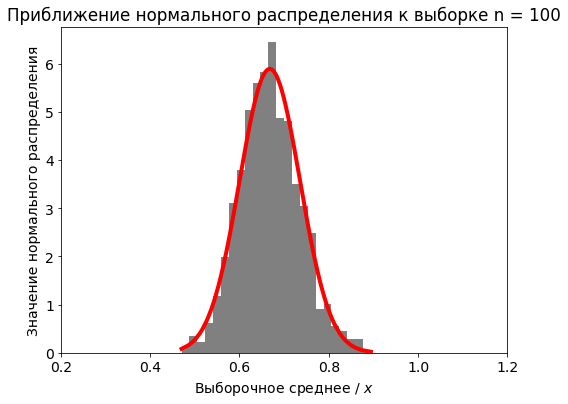

In [8]:
#Построение графика нормального распределения и гистограммы выборки
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 14
plt.title('Приближение нормального распределения к выборке n = 100')
plt.xlim(0.2, 1.2)
plt.ylabel('Значение нормального распределения')
plt.xlabel('Выборочное среднее / $x$')
plt.hist(list_x3, density=True, bins='auto', color='grey')
plt.plot(sorted(list_x3), [normal_pdf(x, func_mean(list_x3), func_std(list_x3)) for x in sorted(list_x3)], color='red', lw=4.0)
plt.show()

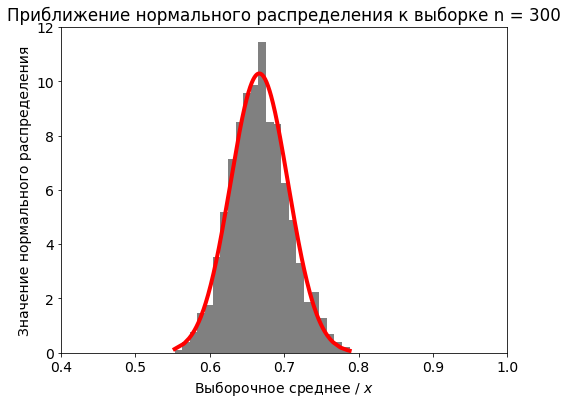

In [9]:
#Построение графика нормального распределения и гистограммы выборки
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 14
plt.title('Приближение нормального распределения к выборке n = 300')
plt.xlim(0.4, 1.0)
plt.ylabel('Значение нормального распределения')
plt.xlabel('Выборочное среднее / $x$')
plt.hist(list_x4, density=True, bins='auto', color='grey')
plt.plot(sorted(list_x4), [normal_pdf(x, func_mean(list_x4), func_std(list_x4)) for x in sorted(list_x4)], color='red', lw=4.0)
plt.show()

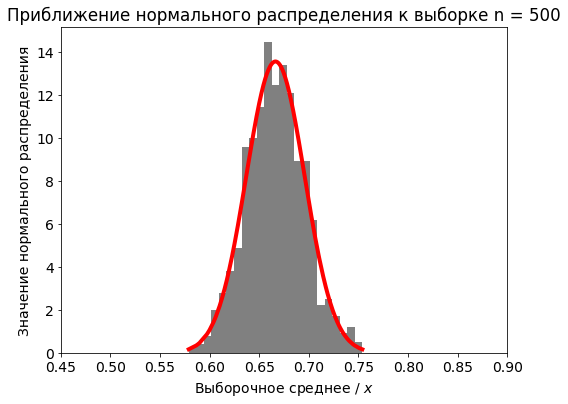

In [12]:
#Построение графика нормального распределения и гистограммы выборки
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 14
plt.title('Приближение нормального распределения к выборке n = 500')
plt.xlim(0.45, 0.9)
plt.ylabel('Значение нормального распределения')
plt.xlabel('Выборочное среднее / $x$')
plt.hist(list_x5, density=True, bins='auto', color='grey')
plt.plot(sorted(list_x5), [normal_pdf(x, func_mean(list_x5), func_std(list_x5)) for x in sorted(list_x5)], color='red', lw=4.0)
plt.show()

##### В результате исследования было достигнуто понимание о реализуемости ЦПТ для экспоненциального распределения. 
##### С увеличением объема выборки повышается аппроксимация распределения выборочных средних нормальным распределением. 
##### Более того, ЦПТ применимо в том числе для асимметричных распределений, примером которого является экспоненциальное распределение.